In [118]:
DATA_PATH="/Users/sidnpoo/Downloads/MLStuff_DoNotDelete/_DATASETS_/face_expresson"

In [119]:
IMAGE_SIZE=48

In [120]:
import pandas as pd
import tqdm 
import numpy as np

In [121]:
#Read the csv as dataframe to understand what's in there.
df = pd.read_csv(DATA_PATH+ "/fer2013.csv")
print(df.head(10))


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
5        2  55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...  Training
6        4  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...  Training
7        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...  Training
8        3  85 84 90 121 101 102 133 153 153 169 177 189 1...  Training
9        2  255 254 255 254 254 179 122 107 95 124 149 150...  Training


In [122]:
#total number of examples
print(len(df))
#find uniques in Usage column and how many
df.Usage.value_counts()

35887


Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [123]:
#number of unique classes
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [124]:
#expressions = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
expressions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [125]:
def read_data(filename, entry_type):
    X=[]
    y=[]
    with open(filename , 'r') as f:
        f.readline() #skip first line
        for line in f:
                if str(entry_type) in line:
                
                    row = line.split(',')
                    y.append(int(row[0]))
                    X.append([int(p) for p in row[1].split()] )
           
            
            
    return np.array(X),np.array(y)
          
            

In [126]:
import os

def load_data(entry_type):
    X_file  = entry_type+"_X.npy"
    y_file = entry_type+"_y.npy"
    
    if os.path.exists(X_file) and os.path.exists(y_file):
        print("Found numpy arrays saved a files..loading ")
        X,y = np.load(X_file), np.load(y_file)
    else:
        print("Numpy array file missing..")
        X, y = read_data(DATA_PATH+ "/fer2013.csv", str(entry_type))
        #save np array to file for faster processing for 2nd run

        np.save(X_file, X)
        np.save(y_file,y)
        
        #normalize the X before returning it
    X = X.astype(np.float32) / 255.0
    y = y.astype(np.int32)   
    return X , y




In [127]:
X_train

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.2901961 , 0.31764707, 0.34117648, ..., 0.7372549 , 0.73333335,
        0.73333335],
       [0.87058824, 0.8901961 , 0.79607844, ..., 0.53333336, 0.53333336,
        0.5254902 ],
       [0.7647059 , 0.78039217, 0.8039216 , ..., 0.02352941, 0.05882353,
        0.14901961]], dtype=float32)

In [128]:
X_train,y_train = load_data("Training")

X_val,y_val = load_data("PrivateTest")

X_test,y_test = load_data("PublicTest")


#reshape to 48x48 and add a dimension
X_train = X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
X_val = X_val.reshape(X_val.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)
X_test = X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)


Found numpy arrays saved a files..loading 
Found numpy arrays saved a files..loading 
Found numpy arrays saved a files..loading 


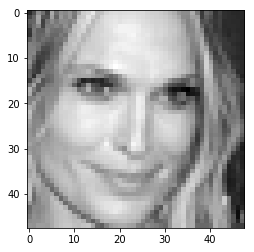

3


In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[20000].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
print(y_train[20000])

In [130]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Reshape
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,  BatchNormalization,  Activation,ZeroPadding2D
from keras import optimizers, callbacks, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json


In [131]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]


In [132]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3),  padding='same',activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(num_classes, activation='softmax'))

#model.load_weights('my_model_bestwts_mod.h5')
sgd = optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
adam=optimizers.Adam(lr=0.0001)

In [148]:
#calls=callbacks.ModelCheckpoint(filepath="my_model_bestwts_mod.h5",monitor='val_acc',
 #                                     save_best_only=False, save_weights_only=False, mode='auto', period=1)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [139]:

#model.fit(train_X, train_y, batch_size=64, epochs=15, verbose=1, validation_data=(test_X, test_y),callbacks=[calls])
#model.save_weights('my_model_weights_mod.h5')
datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=10,
        # randomly shift images horizontally
        width_shift_range=0,
        # randomly shift images vertically
        height_shift_range=0.25,
        # randomly flip images
        horizontal_flip=False,
        # randomly flip images
        vertical_flip=False)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_18 (Activation)   (None, 12, 12, 64)        0         
__________

In [146]:
batch_size = 1024
maxepoches = 60
learning_rate = 0.2
lr_decay = 1e-6
lr_drop = 20

def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = callbacks.LearningRateScheduler(lr_scheduler)



In [147]:
#using image augmentation
historytemp = model.fit_generator(datagen.flow(X_train, y_train,
                             batch_size=batch_size),
                steps_per_epoch=X_train.shape[0] //batch_size,
                epochs=maxepoches,
                validation_data=(X_val, y_val),
                                  callbacks=[reduce_lr],
                                  verbose=1)
'''
model.fit(X_train, y_train, batch_size=100, epochs=60, verbose=1, validation_data=(X_val, y_val))
         # ,callbacks=[calls])
    '''

Epoch 1/60
28/28 [==============================] - 124s 4s/step - loss: 12.7855 - acc: 0.1631 - val_loss: 13.4504 - val_acc: 0.1655
Epoch 2/60
16/28 [================>.............] - ETA: 52s - loss: 13.4504 - acc: 0.1655

KeyboardInterrupt: 

In [149]:
#no image agumentation
model.fit(X_train, y_train, batch_size=100, epochs=60, verbose=1, validation_data=(X_val, y_val))
         # ,callbacks=[calls])

Train on 28709 samples, validate on 3589 samples
Epoch 1/60
22500/28709 [======================>.......] - ETA: 28s - loss: 13.4568 - acc: 0.1651

KeyboardInterrupt: 